<a href="https://colab.research.google.com/github/JLoodts/Practical-Deep-Learning-2022-Part-1/blob/main/00_zoo_vs_wild_animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Is it a zoo or a wild animal?

Based on 'Is it a bird.' from https://github.com/fastai/course22/tree/master


I wanted to find a really though challenge for the neural net. The question whether an image of an animal is taken in the zoo or in the wild seemed a really though one to me. In this notebook we will create a neural network that is as good as possible in predicting this. This will take only a few minutes, using entirely free resources!

The basic steps we'll take are:

1. Use DuckDuckGo to search for images of "wild animal photos"
1. Use DuckDuckGo to search for images of "zoo animal photos"
1. Fine-tune a pretrained neural network to recognise these two groups
1. Try running this model on a picture of a zoo animal and see if it works.

## Step 1: Download images of the categories

In order to easily preview the images and clean the datasets we story everything in our Google Drive.

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# modified from the original to solve ImportError: cannot import name 'ddg_images' from 'duckduckgo_search' (/usr/local/lib/python3.10/dist-packages/duckduckgo_search/__init__.py)
# solution from:  https://forums.fast.ai/t/lesson-1-official-topic/95287/608?u=jloodts
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━

In [2]:
# modified from the original to solve ImportError: cannot import name 'ddg_images' from 'duckduckgo_search' (/usr/local/lib/python3.10/dist-packages/duckduckgo_search/__init__.py)
# solution from:  https://forums.fast.ai/t/lesson-1-official-topic/95287/608?u=jloodts
from fastbook import search_images_ddg

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return search_images_ddg(term, max_images=max_images)

Let's start by searching for a zoo animal photo and seeing what kind of result we get. We'll start by getting URLs from a search:

In [11]:
urls = search_images('zoo animal photos', max_images=1)
urls[0]

Searching for 'zoo animal photos'


'https://gowhee.com/wp-content/uploads/2021/12/zoo360-tigers_highres-2048x1349-1.jpg'

...and then download a URL and take a look at it:

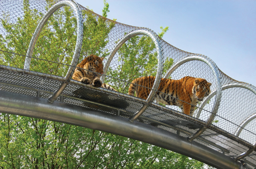

In [12]:
from fastdownload import download_url
dest = '/content/drive/MyDrive/zoo-or-wild/zoo.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with "wild animal photos":

Searching for 'wild animal photos'


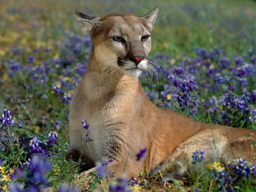

In [13]:
dest = '/content/drive/MyDrive/zoo-or-wild/wild.jpg'
download_url(search_images('wild animal photos', max_images=1)[0], dest, show_progress=False)
Image.open(dest).to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab 200 examples of each, and save each group of photos to a different folder:

In [41]:
searches = 'wild','zoo'
path = Path('/content/drive/MyDrive/zoo-or-wild')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} animal photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} animal sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} animal shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'wild animal photo'
Searching for 'wild animal sun photo'
Searching for 'wild animal shade photo'
Searching for 'zoo animal photo'
Searching for 'zoo animal sun photo'
Searching for 'zoo animal shade photo'


In order to supplement the dataset we manually add some good search prompts, review the results in Google Drive and add the best ones to the appropriate dataset folder.

In [56]:
dest = (Path('/content/drive/MyDrive/extrazoo'))
download_images(dest, urls=search_images('zoo photography'))


Searching for 'zoo photography'


after the manual step above we need to resize all new images

In [57]:
newdest = (Path('/content/drive/MyDrive/extrazoo/zoo'))
resize_images(newdest, max_size=400, dest=newdest)
newdest = (Path('/content/drive/MyDrive/extrazoo/wild'))
resize_images(newdest, max_size=400, dest=newdest)

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [78]:
path = Path('/content/drive/MyDrive/zoo-or-wild')

In [79]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

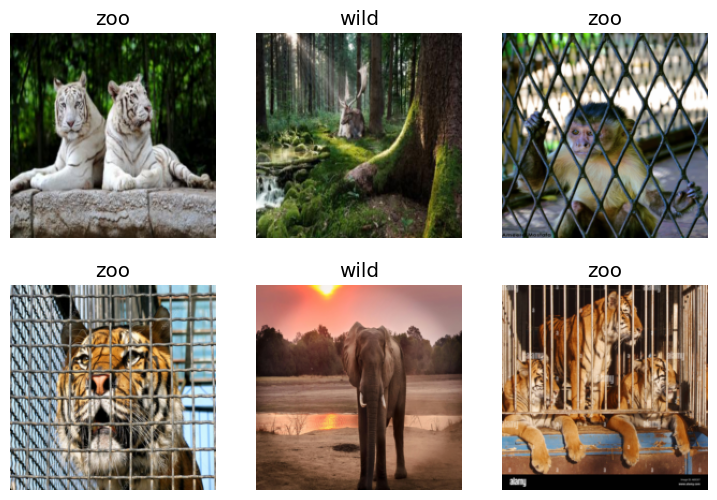

In [80]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

    get_items=get_image_files,

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [81]:
learn = vision_learner(dls, resnet18, metrics=error_rate)


In [82]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.959972,3.946949,0.521739,00:03


epoch,train_loss,valid_loss,error_rate,time
0,2.025592,3.076864,0.565217,00:03
1,1.835328,2.575117,0.521739,00:04
2,1.720248,2.142963,0.521739,00:03


Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

We used the default learning rate before, but we might want to find the best one possible. For this, we can use the learning rate finder:

SuggestedLRs(valley=0.0012022644514217973)

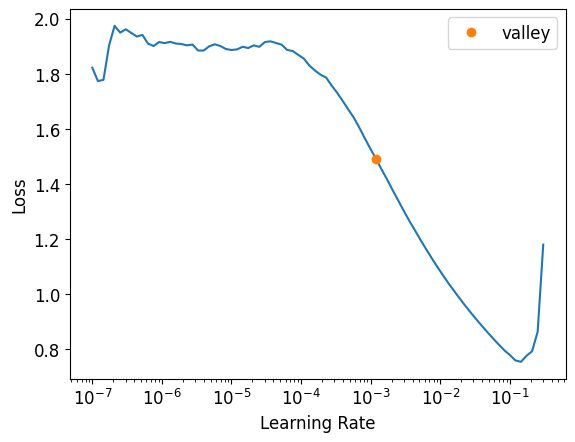

In [63]:
learn.lr_find()


In [67]:
learn.fine_tune(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.056305,1.965513,0.347826,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.035695,1.704185,0.304348,00:02
1,0.032564,1.472626,0.347826,00:03
2,0.024049,1.277053,0.347826,00:03
3,0.020340,1.157103,0.347826,00:03
4,0.018445,1.059554,0.347826,00:03


## Step 3: Use our model (and build your own!)

The predict method returns three things: the decoded prediction, the index of the predicted class and the tensor of probabilities of all classes in the order of their indexed label. This method accepts a filename, a PIL image or a tensor directly in this case.

Let's see what our model thinks about the images we downloaded at the start:

In [73]:
category,categoryIndex,probs = learn.predict(PILImage.create('/content/drive/MyDrive/zoo-or-wild/wild.jpg'))
print(f"This is a: {category} animal.")
print(f"Probability it's a zoo animal: {probs[0]:.4f}")

This is a: zoo-or-wild animal.
Probability it's a zoo animal: 0.0070


In [83]:
learn.predict(PILImage.create('/content/drive/MyDrive/zoo-or-wild/wild.jpg'))

('zoo', tensor(1), tensor([0.0505, 0.4928, 0.4567]))

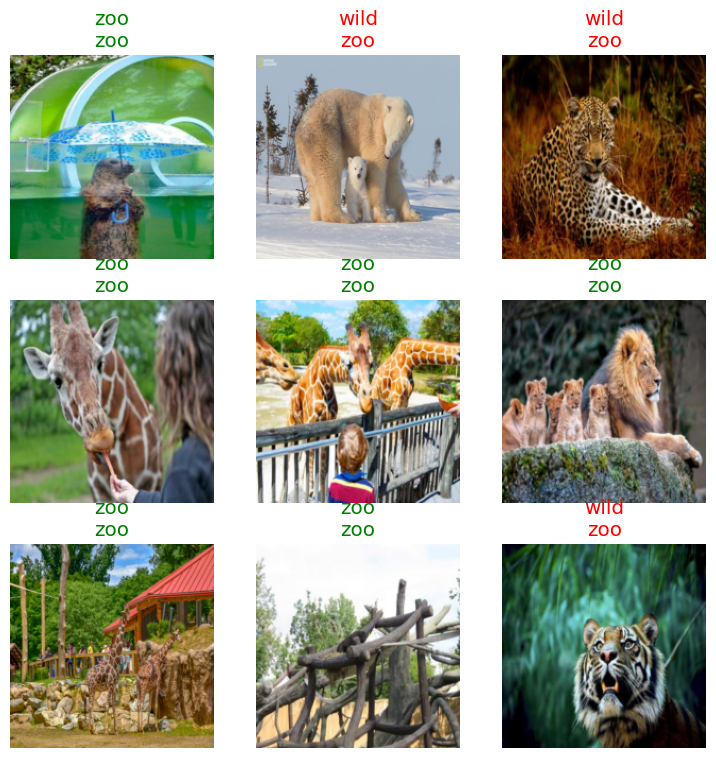

In [75]:
learn.show_results()

Another thing that is useful is an interpretation object, it can show us where the model made the worse predictions:

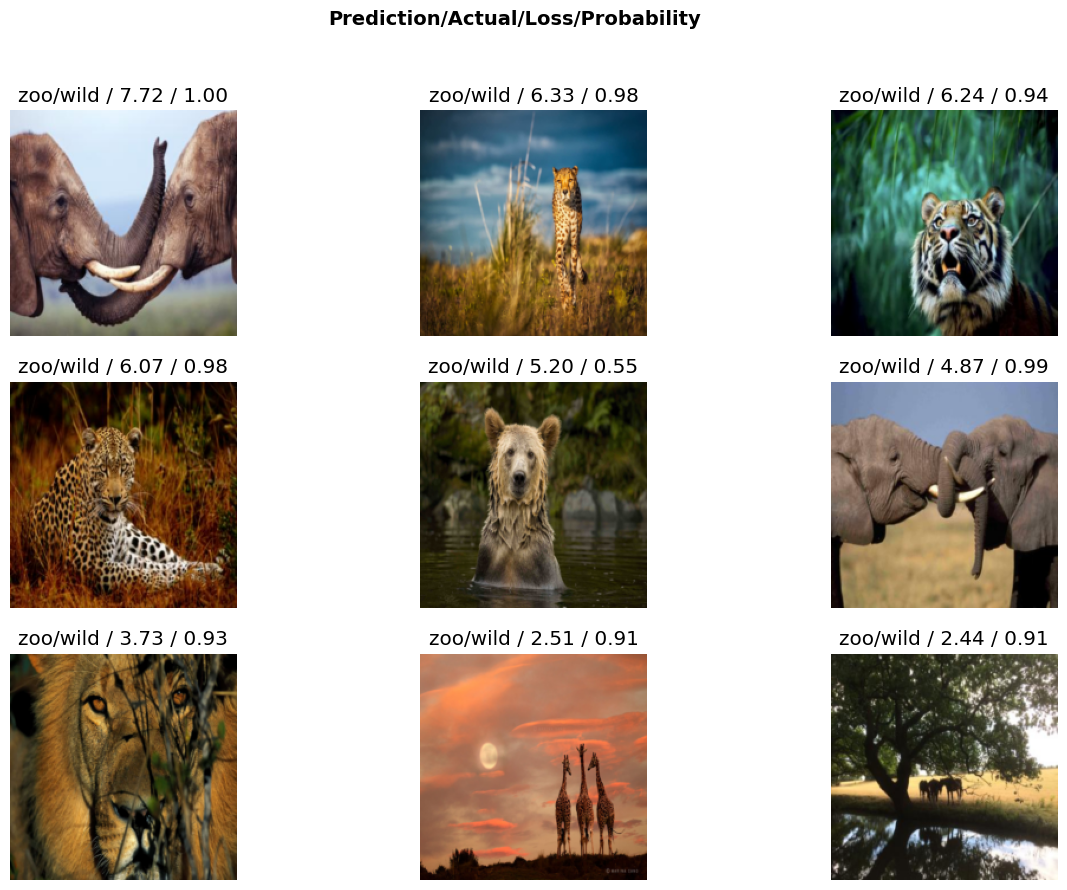

In [76]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))